In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(xtrain,ytrain) ,(xtest,ytest)=keras.datasets.mnist.load_data()

In [3]:
len(xtrain)

60000

In [4]:
len(xtest)

10000

In [5]:
xtrain[0].shape

(28, 28)

In [6]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

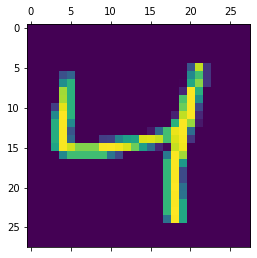

In [7]:
plt.matshow(xtrain[2])

In [8]:
ytrain[2]

4

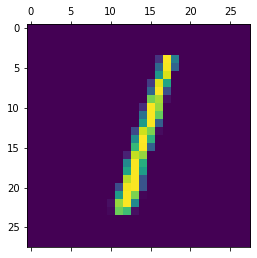

In [9]:
plt.matshow(xtest[2])

In [10]:
ytest[2]

1

In [11]:
ytrain[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
xtrain.shape

(60000, 28, 28)

In [13]:
xtrain=xtrain/255
xtest=xtest/255

In [14]:
xtrain_flattend=xtrain.reshape(len(xtrain),28*28)
xtest_flattend=xtest.reshape(len(xtest),28*28)
 

In [15]:
xtrain_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
    
    
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']


)
model.fit(xtrain_flattend,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 5ms/step - loss: 0.4651 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3035 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2831 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2668 - accuracy: 0.9263


In [17]:
model.evaluate(xtest_flattend,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9271


[0.2671564817428589, 0.9271000027656555]

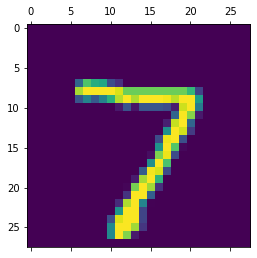

In [18]:
plt.matshow(xtest[0])

In [19]:
y_predicted=model.predict(xtest_flattend)

313/313 [==============================] - 1s 2ms/step


In [20]:
y_predicted[0]

array([4.3111119e-02, 3.2402161e-07, 5.4500353e-02, 9.6574026e-01,
       3.3768162e-03, 1.2386619e-01, 1.6078235e-06, 9.9987084e-01,
       9.2349090e-02, 7.0744503e-01], dtype=float32)

In [21]:
np.argmax(y_predicted[11])

6

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [23]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
cm = tf.math.confusion_matrix(labels=ytest,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    2,    4,    2,   12,    0],
       [   7,    9,  922,   17,    7,    4,   13,   10,   38,    5],
       [   3,    0,   19,  924,    0,   22,    2,   12,   20,    8],
       [   2,    1,    7,    1,  919,    0,    9,    4,    8,   31],
       [  12,    2,    2,   32,   10,  772,   17,    8,   31,    6],
       [  13,    3,    7,    1,    7,   10,  914,    2,    1,    0],
       [   2,    5,   23,    6,    7,    1,    0,  957,    2,   25],
       [  10,    5,    6,   21,    9,   19,   11,   12,  872,    9],
       [  11,    7,    1,   11,   27,    6,    0,   23,    5,  918]])>

Text(69.0, 0.5, 'Truth')

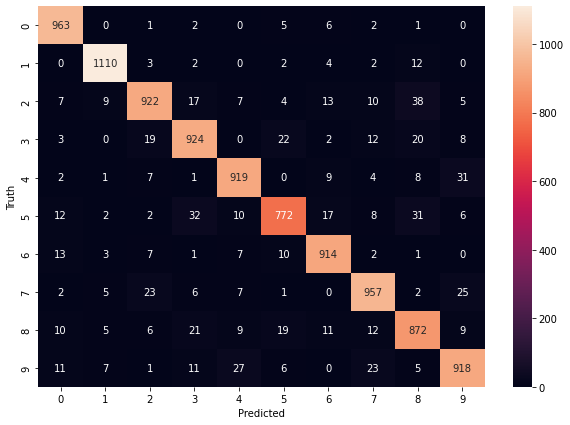

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
    
    
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']


)
model.fit(xtrain_flattend,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2740 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1252 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0878 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0683 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0536 - accuracy: 0.9834


In [27]:
model.evaluate(xtest_flattend,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9762


[0.07789614051580429, 0.9761999845504761]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

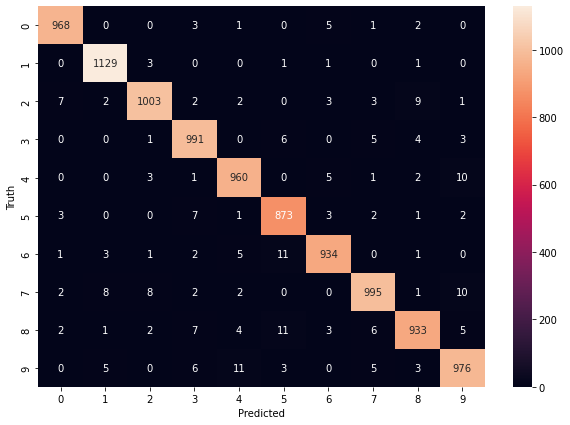

In [28]:
y_predicted=model.predict(xtest_flattend)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=ytest,predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
    
    
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']


)
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2727 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1245 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0880 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0666 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0535 - accuracy: 0.9836


In [30]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0808 - accuracy: 0.9750


[0.08081773668527603, 0.9750000238418579]

In [31]:
model.save("./saved_model_handwritten/")

INFO:tensorflow:Assets written to: ./saved_model_handwritten/assets


# (1) Post training quantization

In [32]:
converter= tf.lite.TFLiteConverter.from_saved_model("./saved_model_handwritten/")
tflite_model=converter.convert()

In [33]:
len(tflite_model)

320032

In [34]:
converter= tf.lite.TFLiteConverter.from_saved_model("./saved_model_handwritten/")
converter.optimizations=[tf.lite.Optimize.DEFAULT]

tflite_quant_model=converter.convert()

In [35]:
len(tflite_quant_model)

84904

In [36]:
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

In [37]:
with open("tflite_quant_model.tflite","wb") as f:
    f.write(tflite_quant_model)

# (2) Quantization aware training

In [38]:
pip install tensorflow-model-optimization

Note: you may need to restart the kernel to use updated packages.


In [41]:
import tensorflow_model_optimization as tfmot
quantize_model = tfmot.quantization.keras.quantize_model
q_aware_model = quantize_model(model)
q_aware_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28)           3         
 er)                                                             
                                                                 
 quant_flatten (QuantizeWrap  (None, 784)              1         
 perV2)                                                          
                                                                 
 quant_dense_3 (QuantizeWrap  (None, 100)              78505     
 perV2)                                                          
                                                                 
 quant_dense_4 (QuantizeWrap  (None, 10)               1015      
 perV2)                                                          
                                                                 
Total params: 79,524
Trainable params: 79,510
Non-trai

In [43]:
q_aware_model.fit(xtrain, ytrain, epochs=1)

1875/1875 [==============================] - 15s 7ms/step - loss: 0.0448 - accuracy: 0.9859


In [45]:
q_aware_model.evaluate(xtrain, ytrain)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0351 - accuracy: 0.9890


[0.03512777015566826, 0.9889666438102722]

In [50]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_qaware_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp4ogxh110\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp4ogxh110\assets
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [51]:
len(tflite_qaware_model)

82776

In [52]:
with open("tflite_qaware_model.tflite", 'wb') as f:
    f.write(tflite_qaware_model)